# Lab session: REGRESSION

Regression analysis is a statistical method used to examine the relationship between one dependent variable and one or more independent variables. The purpose is to predict the value of the dependent variable based on the independent variables.
         
### Hypothesis representation

**Simple/ Univariate Linear Regression:** Examines the relationship between two continuous variables.

We will use $x_i$ to denote the independent variable and $y_i$ to denote dependent variable. The subscripe $i$ in the notation is simply index into the data point. If we have We have $m$  data points, then then $i=1,2,3,...m$.

The goal here is to learn a *hypothesis function* **h**, for a given data points that can used to estimate $y$ based on $x$ . So hypothesis fuction represented as

$$h_\beta(x_i)=\beta_0 + \beta_0 x_i$$

Where:
  - $ h_\beta $ = mathematical function that estimates or predicts the value of the dependent variable $y$ (e.g., Weight) based on the independent variable $x$ (e.g., Height) and a set of parameters $ \beta $. 
     
   - $ \beta_0 $ = y-intercept ( value of $ y $ when the independent variable $ x $ is zero)
     
   - $ \beta_1 $ = slope of the line, indicates how much Weight is expected to increase (or decrease) with each additional centimeter in Height.
     
 **Multiple Linear Regression:** Examines the relationship between one dependent variable and multiple independent variables.
 

For Multiple Linear regression more than one independent variable exit then we will use $x_{ij}$ to denote indepedent variable and $y_i$ to denote dependent variable. If we have $n$ independent variable then $j=1,2,3.....n$ . The hypothesis function represented as

$$
h_\beta(x_i) = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_j x_{ij} + \ldots + \beta_n x_{mn} 
$$
     
- $\beta_0 , \beta_1,....\beta_j....\beta_n$ are parameter of hypothesis, 
- $m$ = Number of training exaples, 
- $n$ = Number of independent variable, 
- $x_{ij}$ is $i^{th}$ data point example of $j^{th}$ feature.

In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load dataset
df= pd.read_csv('Intro to ML Class.csv')
df = df.drop(df.columns[0], axis=1)

print('\nNumber of rows and columns in the data set: ',df.shape)
df.head()



Number of rows and columns in the data set:  (19, 6)


,Height,Weight,Gender,Age,Sporthours/week,"Location: (0 Village, 1: Town, 2: City, 3: Megacity)"
0,178.0,81,M,49,7,1
1,180.0,75,M,22,16,1
2,169.0,53,F,20,0,2
3,183.0,80,M,25,1,1
4,190.0,65,M,25,5,0


Now we have import dataset. When we look at the shape of dataset it has return as (19, 6). So there are  $m=19$
data points and  $n=6$ independent variable. Let's suppose the target variable here is *Weight* and the remaining five variables such as age, Gender, Height, etc... are independent variables. There are multiple independent variable, so the best thing is to fit Multiple linear regression.

But let's start with the simple linear regression where  the independant variable is Height. so the equation will be: 

$$
h_\beta(x_i)=  \beta_0 + \beta_1 * Height 
 $$
 
- If  i=1 then  $h_\beta(x_1)=  \beta_0 + \beta_1 * 178.0 $ and $y_1=81$
 
- If  i=3 then  $h_\beta(x_3)=  \beta_0 + \beta_1 * 169.0 $ and $y_3=53$

And so on...

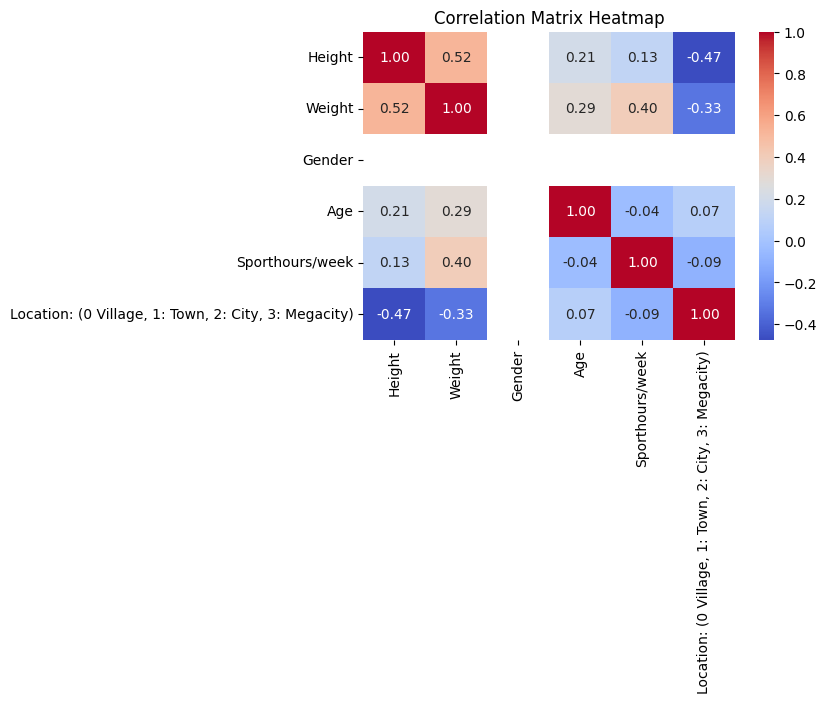

,Height,Weight,Gender,Age,Sporthours/week,"Location: (0 Village, 1: Town, 2: City, 3: Megacity)"
0,178.00,81,NaN,49,7,1
1,180.00,75,NaN,22,16,1
2,169.00,53,NaN,20,0,2
3,183.00,80,NaN,25,1,1
4,190.00,65,NaN,25,5,0
5,178.00,82,NaN,21,4,0
6,188.00,85,NaN,25,8,1
7,178.00,65,NaN,24,2,1
8,179.00,69,NaN,23,2,0
9,178.00,60,NaN,37,0,1


In [4]:
# Exploratory Data Analysis (EDA)
# Encoding Gender
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

df


In [3]:
# Defining independent and dependent variables
X = df[['Height']]  # Independent variable
y = df['Weight']  # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y)

#  Feature Scaling using MinMaxScaler on X values
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Fitting the regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: beta_0 is no need to add, sklearn will take it in account.


LinearRegression()

In [4]:
# Retrieve the intercept and coefficient
 
# # Extract intercept (beta_0)
intercept = lin_reg.intercept_

# Extract coefficient (beta_1)
coefficients = lin_reg.coef_

# Combine intercept and coefficients
params = [intercept] + list(coefficients)

# List of column names, starting with 'intercept'
columns = ['intersect:x_0=1'] + list(X.columns)

# Create a DataFrame to display the parameters (beta values)
param_df = pd.DataFrame({
    'Parameter': [f'beta_{i}' for i in range(len(params))],  # Parameter names like beta_0, beta_1
    'Columns': columns,  # Corresponding feature names
    'beta': params  # The parameters obtained from scikit-learn
})

# Display the table
print(param_df)


  Parameter          Columns       beta
0    beta_0  intersect:x_0=1  68.642857
1    beta_1           Height   5.742471


### Model evaluation

We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute **Mean Square Error** measures how much error in the model is in terms of ability to estimate the relationship between  $x$ and  $y$, using formula

$$J(\theta)=\dfrac{1}{m}\sum_{i=1}^m (\hat{y}_i−y_i)^2$$
 
$$J(\theta)=\dfrac{1}{m}\sum_{i=1}^m (h_\theta(x_i)−y_i)^2$$

We also compute the $R^2$ which is a statistical measure of how close data are to the fitted regression line. $R^2$
 is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

$$R^2 = 1−\dfrac{SSE}{SST}$$
$$\text{SSE} = \text{Sum of Square Error} = \sum_{i=1}^m (\hat{y}_i−y_i)^2$$

$$\text{SST} = \text{Sum of Square Total} = \sum_{i=1}^m (y_i−\bar{y_i})^2$$


Here $\hat{y}_i$ is predicted value and $\bar{y}_i$ is mean value of y.


In [5]:
y_pred = lin_reg.predict(X_test)

#Evaluvation: MSE
J_mse = np.sum((y_pred - y_test)**2)/ X_test.shape[0]

# R_square 
sse = np.sum((y_pred - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(beta) with equation is: ',J_mse)
print('R square obtain with equation is :',R_square)

The Mean Square Error(MSE) or J(beta) with equation is:  68.18636777603754
R square obtain with equation is : 0.008919073022710222


In [6]:
J_mse_sk = mean_squared_error(y_pred, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(beta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(beta) is:  68.18636777603754
R square obtain for scikit learn library is : 0.008919073022710222


In [7]:
# Display Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Weights:")
print(comparison)


Actual vs Predicted Weights:
    Actual  Predicted
2       53  69.201719
15      74  69.327286
8       69  70.457388
16      67  69.201719
10      77  69.955120


### Model Validation

Linear Relationship

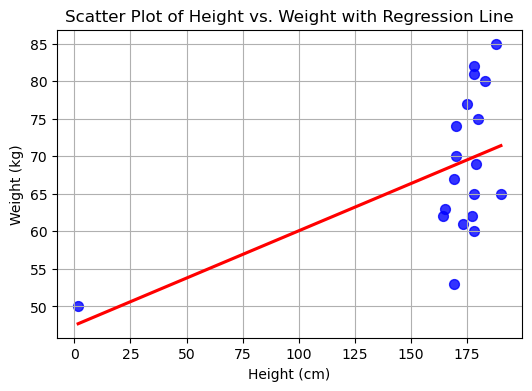

In [8]:
# Scatter plot with regression line
plt.figure(figsize=(6, 4))
sns.regplot(x='Height', y='Weight', data=df, ci=None, scatter_kws={'s': 50, 'color': 'blue'}, 
            line_kws={'color': 'red'})

plt.title('Scatter Plot of Height vs. Weight with Regression Line')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()


Trend: The red regression line shows the trend of increasing weight with increasing height.
Data Points: Each blue dot represents an individual’s height and weight.

- Data points do not closely follow a straight line, indicating a non linear relationship

- The relationship between the predictor and target is non-linear, suggesting that a linear model may be insufficient.

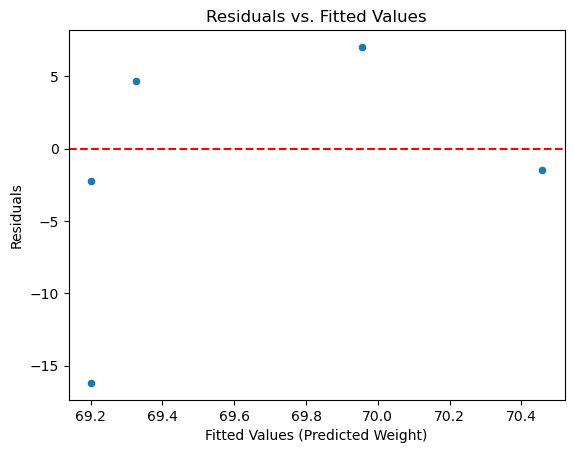

In [9]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values (Predicted Weight)')
plt.ylabel('Residuals')
plt.show()

Ideally, residuals should be randomly scattered around zero, indicating that the model's predictions are unbiased.

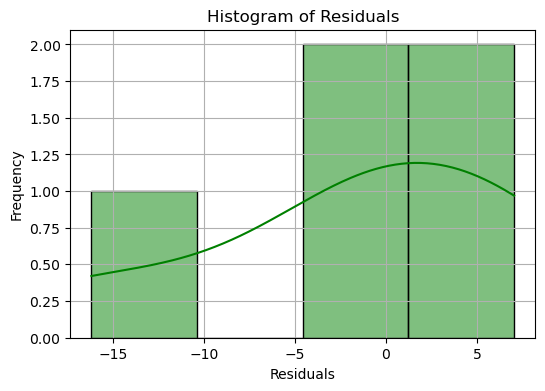

In [10]:
# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='green')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

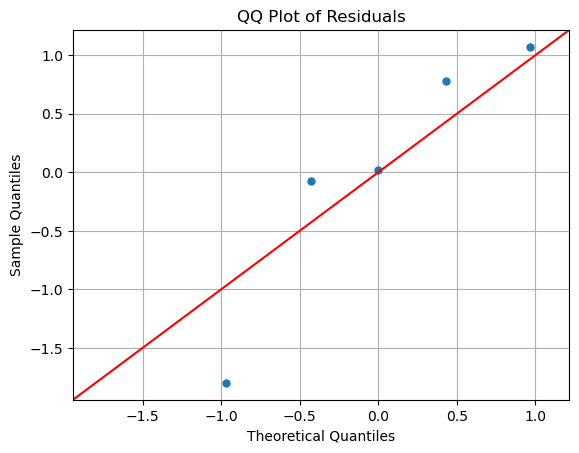

In [11]:
# QQ plot of residuals
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True, markersize=5)
plt.title('QQ Plot of Residuals')
plt.grid(True)
plt.show()

QQ (Quantile-Quantile) plot compares the distribution of residuals to a normal distribution.

If the residuals follow a normal distribution, the points should closely align along the 45-degree reference line (the red line)

## Multiple Linear Regression

Let's now consider all the others variables as independant variable... The equations will become: 

$$
h_\beta(x_i)=\beta_0 +\beta_1*Height + \beta_2 * Gender + \beta_3 * Age + \beta_4 * Sporthours + \beta_5 * Location
 $$
 
- If  i=1 then  $h_\beta(x_i)=\beta_0 +\beta_1*178.0 + \beta_2 * Male + \beta_3 * 49 + \beta_4 * 7 + \beta_5 * 1$
 
- If  i=3 then  $h_\beta(x_i)=\beta_0 +\beta_1*180.0 + \beta_2 * Female + \beta_3 * 20 + \beta_4 * 0 + \beta_5 * 2$

And so on...

In [12]:
## TO DO

##### BUILD THE Multiple Linear Regression, EVALUATE AND VERIFY THE LINEARITY.

**Model Evaluation**
   - **R-squared:** Indicates how well the independent variables explain the variability of the dependent variable.
   - **MSE**
   - **p-values:** Assess the significance of each coefficient.
   - **Residual Analysis:** Check the residuals to understand the model fit.
